# Qiskit Mini-Projects and Libraries

In [7]:
# Classical Tools
"""
python libraries:
    numpy ----------------> math, matrices
    matplotlib/pyplot ----> visualization
    pandas ---------------> data handling
    scipy.optimize -------> for QAOA/VQE

    qiskit add-ons:
    qiskit.algorithms ----> VQE, QAOA, Grover, ...
    qiskit_nature --------> chemistry
    qiskit_optimization --> TSP, MaxCut, ...
"""

# Mini-Projects
"""
1. Grover's Search: find a secret item in a list
2. QAOA Optimization: Solve MaxCut/simple scheduling problem
3. Quantum-Enhanced Machine Learning: using hybrid classification
4. Real Molecule Energy Estimation: using VQE
"""

"\n1. Grover's Search: find a secret item in a list\n2. QAOA Optimization: Solve MaxCut/simple scheduling problem\n3. Quantum-Enhanced Machine Learning: using hybrid classification\n4. Real Molecule Energy Estimation: using VQE\n"

# 1. Grover's Search:

In [8]:
# Goal: Find a secret 2-bit password using Grover's algorithm
"""
- Create quantum oracle that marks secret bitstring --> Secret Password = '11'
- Apply Grover's amplification to boost probability
- Measure & retrieve password
- Plot histogram of measurements
"""

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer #new way of doing "from qiskit import Aer"

#define password:
target = '11' #secret password

#construct the oracle:
def password_oracle(circuit, target_bits): #oracle --> flips phase of (the correct answer) target state
    if target_bits == '00': #case 1
        circuit.z([0, 1])
        circuit.cz(0, 1)
        circuit.z([0, 1])
    elif target_bits == '01': #case 2
        circuit.x(0)
        circuit.cz(0, 1)
        circuit.x(0)
    elif target_bits == '10': #case 3
        circuit.x(1)
        circuit.cz(0, 1)
        circuit.x(1)
    elif target_bits == '11': #case 4
        circuit.cz(0, 1)

#Grover diffusion:
def diffuser(circuit): #grover diffusion operator: amplifies probability of target states & reduces others
    circuit.h([0, 1])
    circuit.x([0, 1])
    circuit.h(1)
    circuit.cx(0, 1)
    circuit.h(1)
    circuit.x([0, 1])
    circuit.h([0, 1])

In [9]:
#build Grover circuit:
qc = QuantumCircuit(2, 2)
qc.h([0, 1])

#apply the oracle and diffuser:
password_oracle(qc, target)
diffuser(qc)

#measure output:
qc.measure([0, 1], [0, 1])

In [10]:
#simulate the circuit (this method uses Qiskit's built-in Aer simulator, as oposed to using cloud/IBM quantum hardware):
simulator = Aer.get_backend('aer_simulator') #uses AerSimulator as circuit backend
compiled = transpile(qc, simulator) #transpiles circuit
job = simulator.run(compiled, shots = 1024) #new way instead of 'execute(compiled, backend = simulator, shots = 1024)

result = job.result()
counts = result.get_counts()

#output most probable results:
most_likely = max(counts, key = counts.get)
print("Cracked Password:", most_likely)

Cracked Password: 11


In [11]:
#Practice:

from qiskit import QuantumCircuit

qc = 

SyntaxError: invalid syntax (370570100.py, line 5)

# 2. Quantum Approximate Optimization Algorithm (QAOA) Optimization: 

In [ ]:
# Goal: Solve MaxCut or a simple scheduling problem

"""
- Given a graph where each edge has a cost --> divide graph's nodes into 2 groups so
# of cut edges (diagonals) is maximized (combinatorial optimization --> QAOA tackles this)
- Create graph with NetworkX
- Use Qiskit's QAOA tool
- Use classical optimizer to tweak quantum circuit parameters
- Visualize results
"""

import networkx as nx #creates graphs
from qiskit_optimization.applications import MaxCut
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization import QuadraticProgram
import matplotlib.pyplot as plt

#crate a 4-node graph:
graph = nx.Graph()
edges = [(0, 1), (0, 2), (1, 2), (2, 3)]
graph.add_edges_from(edges)

#visualize graph:
nx.draw(graph, with_labels = True, node_color = 'lightblue', edge_color = 'gray')
plt.title("MaxCut Graph")
plt.show()

#convert to MaxCut QUBO problem:
maxcut = MaxCut(graph)
qubo = maxcut.to_quadratic_program()

ModuleNotFoundError: No module named 'qiskit_optimization'

In [ ]:
#solve using QAOA:
from qiskit.algorithms import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_aer import Aer
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit.algorithms.optimizers import COBYLA

#set up quantum simulator:
backend = Aer.get_backend('aer_simulator_statevector')
quantum_instance = QuantumInstance(backend)

#set up QAOA:
qaoa = QAOA(optimizer = COBYLA(), reps = 1, quantum_instance = quantum_instance) #higher reps increases accuracy and runtime
optimizer = MinimumEigenOptimizer(qaoa)

#solve MaxCut problem:
result = optimizer.solve(qubo)

#output solution:
print("Best partition (bitstring):", result.x)
print("MaxCut value (edges cut):", result.fval)

ModuleNotFoundError: No module named 'qiskit.algorithms'

In [ ]:
#visualize the cut:
colors = ['red' if bit == 0 else 'blue for bit in result.x'] #sliced loop
nx.draw(graph, with_labels = True, node_color = colors, edge_color = 'black')
plt.title("QAOA MaxCut Partition")
plt.show()

# Another QAOA Problem

In [ ]:
"""
Promisint Quantum Application Areas: 
- Simulating Nature
- Processing Data with Complex Structure
- Optimization (e.g. flight/delivery paths accross the country, MaxCut, QAOA)

MaxCut: An optimization problem that mazimizes the # of edges cut by a subdivided graph
"""



'\nPromisint Quantum Application Areas: \n- Simulating Nature\n- Processing Data with Complex Structure\n- Optimization (e.g. flight/delivery paths accross the country, MaxCut, QAOA)\n\nMaxCut: An optimization problem that mazimizes the # of edges cut by a subdivided graph\n'

# 3. Quantum-Classical Hybrid Classifier (QSVM/ Quantum Neural Network)

In [ ]:
# Goal: Build a binary classifier that learns to distinguish between 2 classes using a 
# variational quantum circuit and classical training

"""
- Given a dataset with 2 classes (0 & 1), train a quantum machine learning (ML) model to
classify new points correctly
- Start with 2D dataset (points in a plane), use parameterized quantum circuit as ML model
- Use use QNN to teach the VQC model
- hybrid train using classical optimizers

"""

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#create a binary classification dataset (2 features):
x, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2,
                           n_redundant = 0, n_clusters_per_class = 1, class_sep = 2.0
                           random_state = 42)

#normalize features to [0, pi]
scaler = MinMaxScaler(feature_range = 0, np.pi)
x_scaled = scaler.fit_transform(x)

#split into train/test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [ ]:
#build the quantum model:
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_machine_learning import TwoLocal
from qiskit_machine_learning.datasets import ad_hoc_data

from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance
from qiskit_aer import Aer

#define feature map (how to encode data into a quantum state)
feature_map = RawFeatureVector(2)

#define variational form (learnable part)
ansatz = TwoLocal(2, ['ry', 'rz'], 'cz', reps = 2)

#set up simulator
backend = Aer.get_backend('aer_simulator_statevector')
quantum_instance = QuantumInstance(backend)

#define VQC model:
vqc = VQC(feature_map = feature_map, ansatz = ansatz, optimizer = COBYLA(), 
          quantum_instance = quantum_instance)

In [ ]:
#train the model:
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier

#use vqc as a classifier:
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit.primitives import Estimator

#build a QNN (quantum neural network):
qnn = EstimatorQNN(circuit = ansatz, input_params = feature_map.parameters, #as opposed to logistic regression
                   weight_params = ansatz.parameters, estimator = Estimator())

#wrap it as a scikit-learn classifier:
classifier = NeuralNetworkClassifier(qnn, optimizer = COBYLA(maxiter = 100))

#train:
classifier.fit(x_train, y_train) #fits the data to the regression line

#test accuracy:
accuracy = classifier.score(x_test, y_test)
print(f"Test Accuracy: {accuracy: .2f}")

In [ ]:
#visualization:
import matplotlib.pyplot as plt

def plot_2d(x, y, title = "Data"):
    plt.figure(figsize = (5, 5))
    plt.scatter(x[:, 0], x[:, 1], c = y, cmap = 'coolwarm', s = 40)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_2d(x_test, classifier.predict(x_test), title = "Predicted Classes")

# 4. Variational Quantum Eigensolver (VQE) to Simulate a Molecule

In [ ]:
# Goal: Use VQE to calculate the ground-state energy of a H₂ molecule with
# quantum chemistry using quantum circuits

"""
- Use Qiskit Nature --> for quantum chemistry
- Use VQE + variational ansatz + classical optimizer
- Run hybrid quantum-classical workflows
- Compare results to known values
"""

#define the molecule:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit

#create a driver to define modecule (H₂ with 0.735 Å bond length):
driver = PySCFDriver(atom = 'H 0 0 0; H 0 0 0.735',
                     basis = 'sto3g', unit = DistanceUnit.ANGSTROM)

problem = driver.run()

ImportError: cannot import name 'BaseSampler' from 'qiskit.primitives' (/Users/onkar/Desktop/Qiskit-Tutorial-Projects/.venv/lib/python3.12/site-packages/qiskit/primitives/__init__.py)

In [ ]:
#map to qubits:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.circuit.library import HartreeFock

#map to qubits using Jordan-Wigner:
mapper = JordanWignerMapper()
qubit_op = mapper.map(problem.hamiltonian)

In [ ]:
#set up VQE:
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit import Aer

#choose ansatz (trial wavefunction):
ansatz = TwoLocal(rotation_blocks = 'ry', entanglement_blocks = 'cz', entanglement = 'full', reps = 1)

#use VQE with classical optimizer:
vqe_solver = VQE(ansatz = ansatz, optimizer = SLSQP(), estimator = Estimator())

#solve:
result = vqe_solver.compute_minimum_eigenvalue(qubit_op)

print(f"Estimated ground state energy: {result.eigenvalue.real: .6f} Hartree")

In [ ]:
#compare to exact energy:
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

#use classical exact solver for reference:
exact_solver = NumPyMinimumEigensolver()
exact_result = exact_solver.compute_minimum_eigenvalue(qubit_op)

print(f"Exact ground state energyL {exact_result.eigenvalue.real: .6f} Hartree")

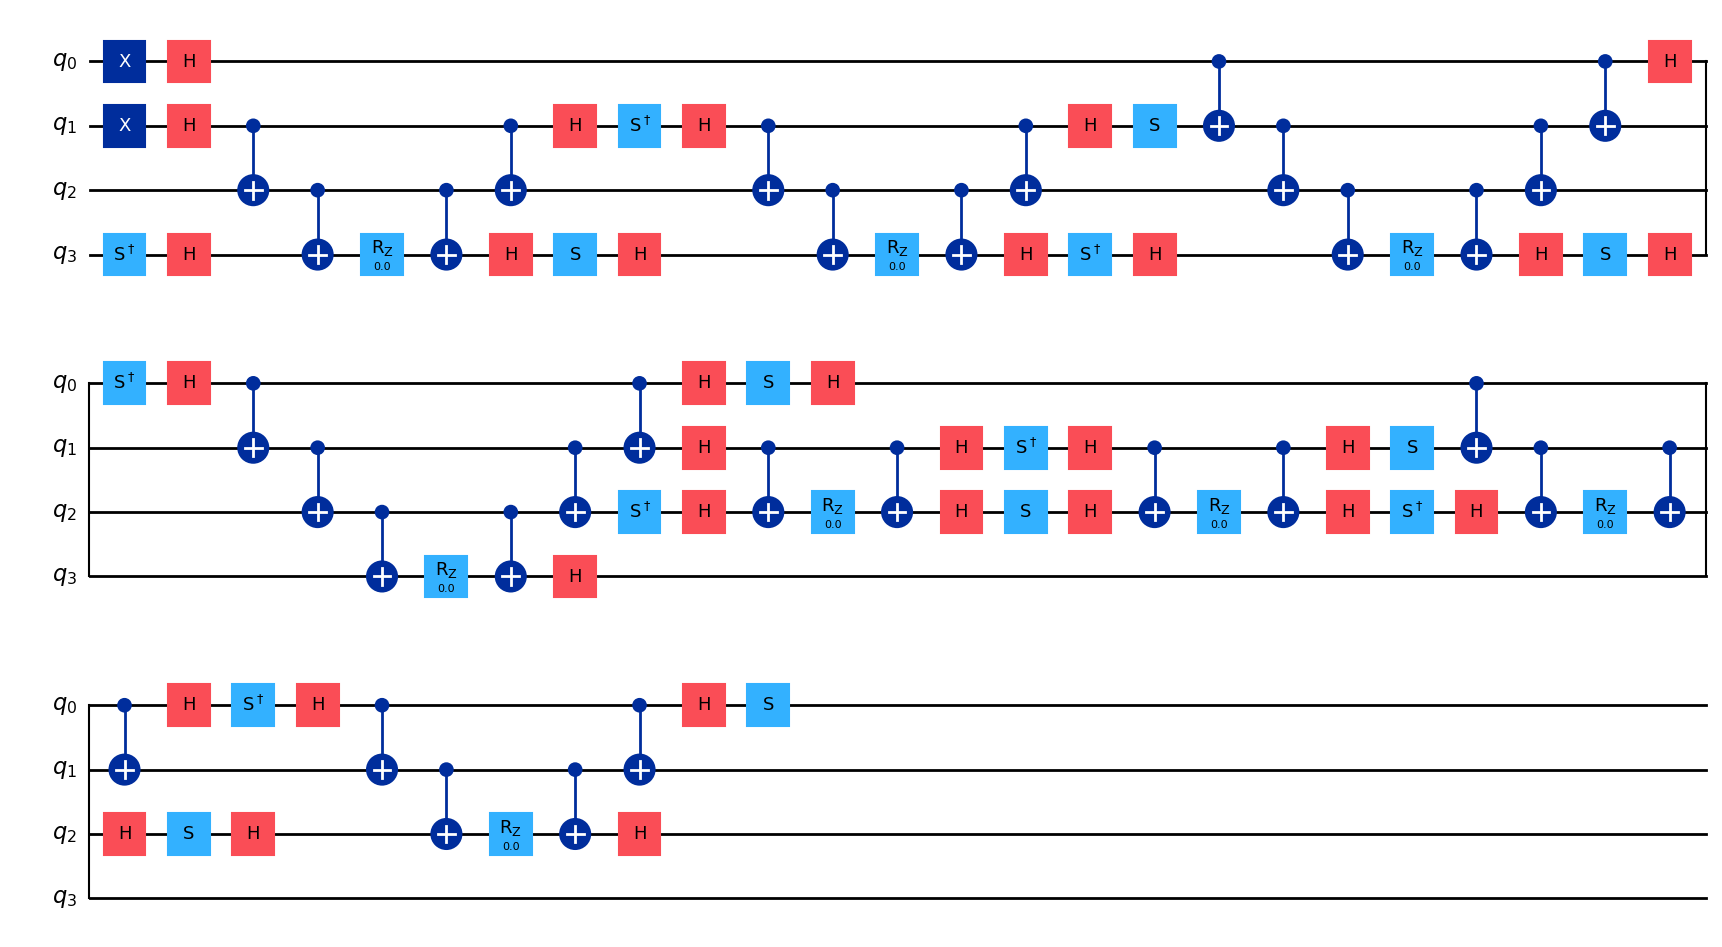

In [23]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from itertools import combinations
import numpy as np

def generate_singles(occ, virt):
    return [(i, a) for i in occ for a in virt]

def generate_doubles(occ, virt):
    return [(i, j, a, b)
            for i, j in combinations(occ, 2)
            for a, b in combinations(virt, 2)]

def jw_single_excitation(i, a, n_qubits):
    """
    Return Pauli strings (Z..Z X..X Y..Y etc.) for a†_a a_i - h.c.
    """
    ops = []

    z_string = ['I'] * n_qubits
    for k in range(min(i, a)+1, max(i, a)):
        z_string[k] = 'Z'

    if i < a:
        label1 = z_string.copy()
        label1[i] = 'Y'
        label1[a] = 'X'
        ops.append((''.join(reversed(label1)), 0.5j))

        label2 = z_string.copy()
        label2[i] = 'X'
        label2[a] = 'Y'
        ops.append((''.join(reversed(label2)), -0.5j))

    else:
        label1 = z_string.copy()
        label1[a] = 'Y'
        label1[i] = 'X'
        ops.append((''.join(reversed(label1)), -0.5j))

        label2 = z_string.copy()
        label2[a] = 'X'
        label2[i] = 'Y'
        ops.append((''.join(reversed(label2)), 0.5j))

    return ops

def apply_pauli_rotation(qc, label, theta):
    """
    Apply exp(-i * theta * P) to the circuit, where P is a Pauli string.
    """
    n = len(label)
    # Step 1: basis change
    for i in range(n):
        if label[i] == 'X':
            qc.h(i)
        elif label[i] == 'Y':
            qc.sdg(i)
            qc.h(i)
        # 'Z' and 'I' are fine

    # Step 2: CNOT ladder
    qubits = [i for i, p in enumerate(label) if p != 'I']
    for i in range(len(qubits)-1):
        qc.cx(qubits[i], qubits[i+1])

    # Step 3: Rz rotation
    qc.rz(2 * theta, qubits[-1])

    # Step 4: Undo CNOTs
    for i in reversed(range(len(qubits)-1)):
        qc.cx(qubits[i], qubits[i+1])

    # Step 5: Undo basis change
    for i in range(n):
        if label[i] == 'X':
            qc.h(i)
        elif label[i] == 'Y':
            qc.h(i)
            qc.s(i)

def build_manual_uccsd(n_qubits, occ, virt):
    qc = QuantumCircuit(n_qubits)

    # HF reference state
    for i in occ:
        qc.x(i)

    singles = generate_singles(occ, virt)
    param_index = 0

    for (i, a) in singles:
        pauli_terms = jw_single_excitation(i, a, n_qubits)
        theta = Parameter(f"θ_{param_index}")
        for label, coeff in pauli_terms:
            apply_pauli_rotation(qc, label, coeff.real * theta)
        param_index += 1

    # TODO: Add double excitations too (optional step)

    return qc

n_qubits = 4
occupied = [0, 1]
virtual = [2, 3]

uccsd = build_manual_uccsd(n_qubits, occupied, virtual)
uccsd.draw('mpl')

In [19]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)

qc.h(0)
# qc.s(0)
# qc.h(0)
qc.t(0)
statevector = Statevector(qc)
statevector.draw('latex')

# qc.s(0)
# qc.h(0)
# qc.t(0)

# qc.draw('mpl')

<IPython.core.display.Latex object>